In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [46]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [47]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [48]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

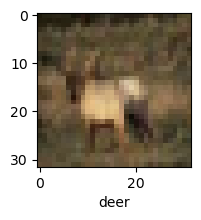

In [49]:
plot_sample(x_train, y_train.flatten(), 3)

### Normalize

In [50]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [51]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3027 - loss: 1.9365
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4195 - loss: 1.6493
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4512 - loss: 1.5563
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4772 - loss: 1.4926
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4925 - loss: 1.4389


In [53]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4652 - loss: 1.4829


[1.491418719291687, 0.4584999978542328]

In [54]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.43      0.52      1000
           1       0.75      0.30      0.43      1000
           2       0.47      0.23      0.31      1000
           3       0.29      0.49      0.36      1000
           4       0.51      0.28      0.36      1000
           5       0.39      0.30      0.34      1000
           6       0.52      0.55      0.53      1000
           7       0.53      0.53      0.53      1000
           8       0.54      0.68      0.60      1000
           9       0.37      0.79      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



## Apply CNN

In [94]:
cnn = models.Sequential([
    layers.Conv2D(6,kernel_size=(5,5),padding='valid',activation='relu',input_shape=(32,32,3)),
    layers.AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'),

    layers.Conv2D(16,kernel_size=(5,5),padding='valid',activation='relu'),
    layers.AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'),

    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    Dense(84,activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
cnn.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5563 - loss: 1.2467 - val_accuracy: 0.5585 - val_loss: 1.2359
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5839 - loss: 1.1707 - val_accuracy: 0.5574 - val_loss: 1.2328
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5991 - loss: 1.1276 - val_accuracy: 0.5672 - val_loss: 1.2165
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6214 - loss: 1.0726 - val_accuracy: 0.5829 - val_loss: 1.1865
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6395 - loss: 1.0255 - val_accuracy: 0.5979 - val_loss: 1.1514
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6484 - loss: 0.9943 - val_accuracy: 0.5800 - val_loss: 1.2152
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6597 - loss: 0.9642 - val_accuracy: 0.5957 - val_loss: 1.1753
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6722 - loss: 0.9230 - 

In [98]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6054 - loss: 1.1842


[1.199042797088623, 0.597599983215332]

In [99]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.62      0.65      1000
           1       0.73      0.69      0.71      1000
           2       0.57      0.38      0.45      1000
           3       0.41      0.41      0.41      1000
           4       0.58      0.53      0.55      1000
           5       0.51      0.48      0.50      1000
           6       0.62      0.73      0.67      1000
           7       0.67      0.64      0.66      1000
           8       0.66      0.74      0.70      1000
           9       0.55      0.75      0.63      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



<Axes: >

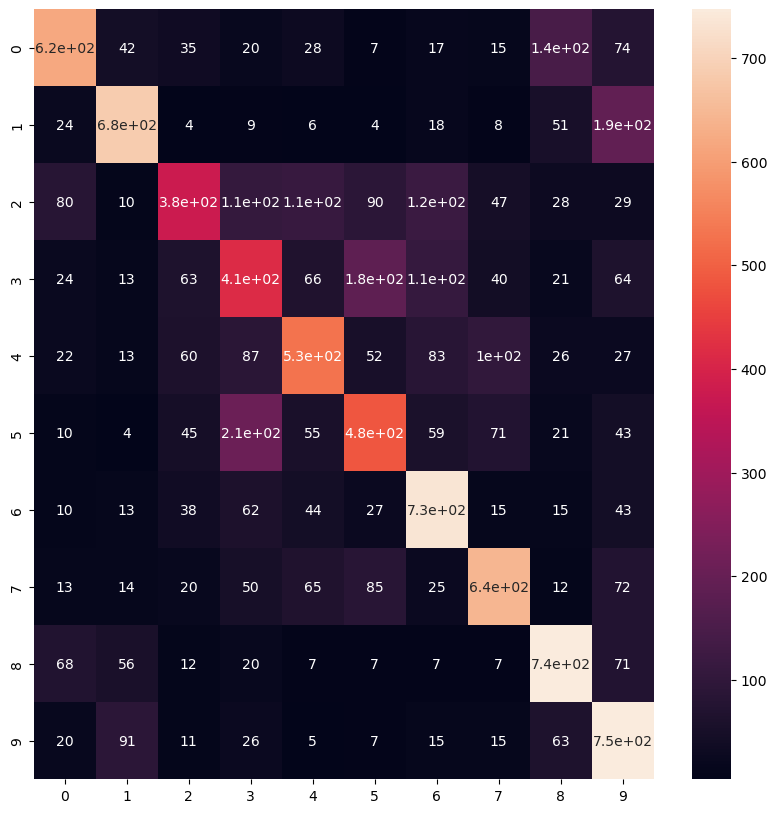

In [100]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True)

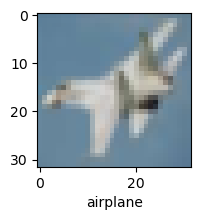

In [117]:
plot_sample(x_test, y_test.flatten(), 10)


In [118]:
classes[y_pred_classes[10]]

'airplane'

In [114]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 1, 1, 0, 4, 6, 1, 6, 3, 1]

In [116]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)